## Excercise Logistic Regression


In [277]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("data/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [278]:
df_temp = df.drop(["Department", "salary"], axis=1)  # mean() no work on non numbers
df_temp.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


for left:

1. satisfaction_level lower
2. average_montly_hours slightly higher
3. Work_accident higher
4. promotion_last_5years lower


<BarContainer object of 10 artists>

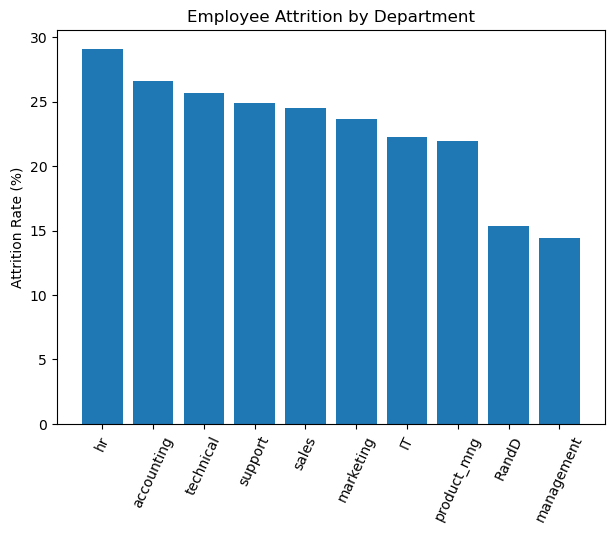

In [279]:
df_dept = df[["Department", "left"]]
sums = df_dept.groupby("Department").mean() * 100
sums = sums.sort_values(by="left", ascending=False)

plt.ylabel("Attrition Rate (%)")
plt.title("Employee Attrition by Department")
plt.xticks(rotation=65)
plt.tight_layout()

plt.bar(sums.index, sums.left)

<BarContainer object of 3 artists>

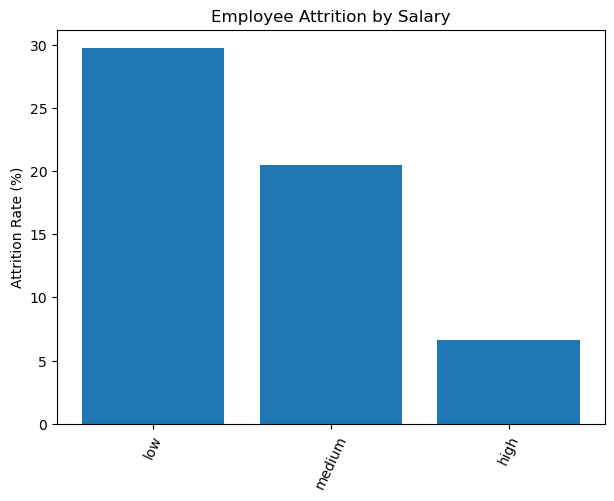

In [280]:
df_dept = df[["salary", "left"]]
sums = df_dept.groupby("salary").mean() * 100

salary_order = ["low", "medium", "high"]
sums = sums.loc[salary_order]

plt.ylabel("Attrition Rate (%)")
plt.title("Employee Attrition by Salary")
plt.xticks(rotation=65)
plt.tight_layout()

plt.bar(sums.index, sums.left)

# plt.bar(df["Department"], df.left)

In [281]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [282]:
# get data we are interested in
# try with Department after
X = df[
    [
        "satisfaction_level",
        "average_montly_hours",
        "Work_accident",
        "salary",
        "promotion_last_5years",
    ]
]
y = df.left

X.head()

,satisfaction_level,average_montly_hours,Work_accident,salary,promotion_last_5years
0,0.38,157,0,low,0
1,0.80,262,0,medium,0
2,0.11,272,0,medium,0
3,0.72,223,0,low,0
4,0.37,159,0,low,0


In [283]:
# dummify
X = pd.get_dummies(X)
X = X.iloc[:, :-1]
X

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,False,True
1,0.80,262,0,0,False,False
2,0.11,272,0,0,False,False
3,0.72,223,0,0,False,True
4,0.37,159,0,0,False,True
...,...,...,...,...,...,...
14994,0.40,151,0,0,False,True
14995,0.37,160,0,0,False,True
14996,0.37,143,0,0,False,True
14997,0.11,280,0,0,False,True


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3)

In [285]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.predict(X_test)

/home/jgmartin/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [286]:
log_reg.score(X_test, y_test)

0.782